In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport
from matplotlib import pyplot as plt

In [83]:
df = pd.read_csv(r"/content/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There is no null variable and data is clean


In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [84]:
df = df.drop(['instant','casual','registered','dteday'],axis=1)

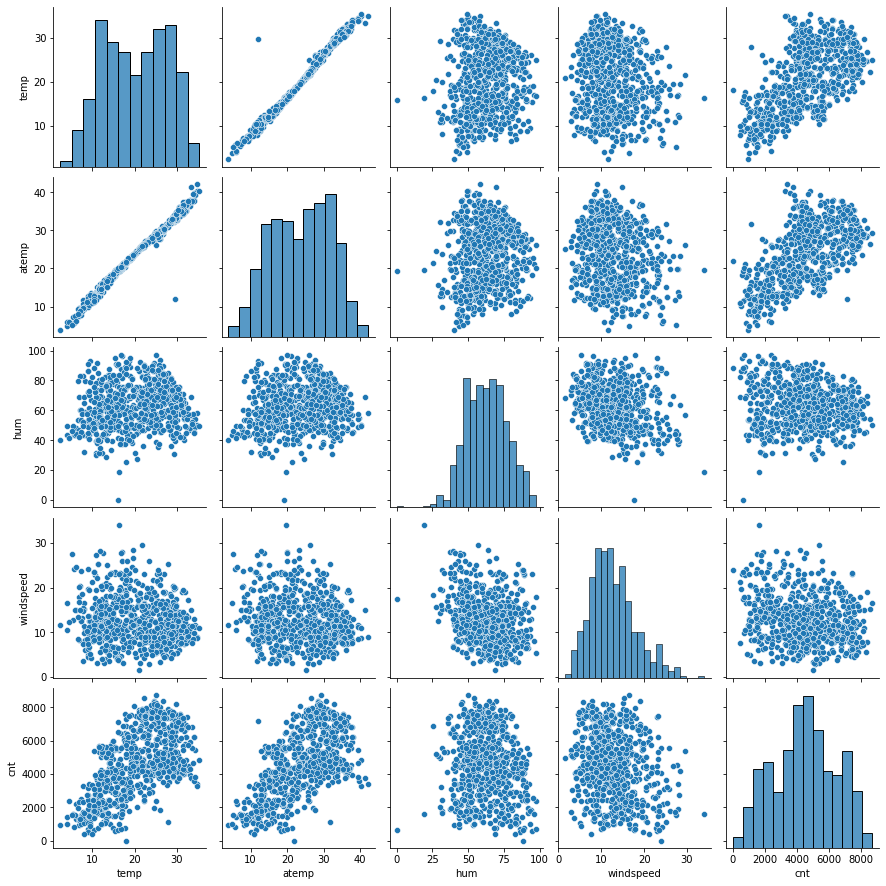

In [6]:
sns.pairplot(df[["temp","atemp","hum","windspeed","cnt"]])
plt.show()

It can be seen that temp have a positive coorelation

In [85]:
df = df.drop('temp',axis=1) #Since Temp and aTemp are highly coorelated we are droping one

In [8]:
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.120559,0.590277,0.039769,-0.295929
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.141512,1.000000,-0.248506,-0.098543
windspeed,-2.296069e-01,-1.162435e-02,-2.080131e-01,0.006257,0.014283,-0.018666,0.039769,-0.183876,-0.248506,1.000000,-0.235132


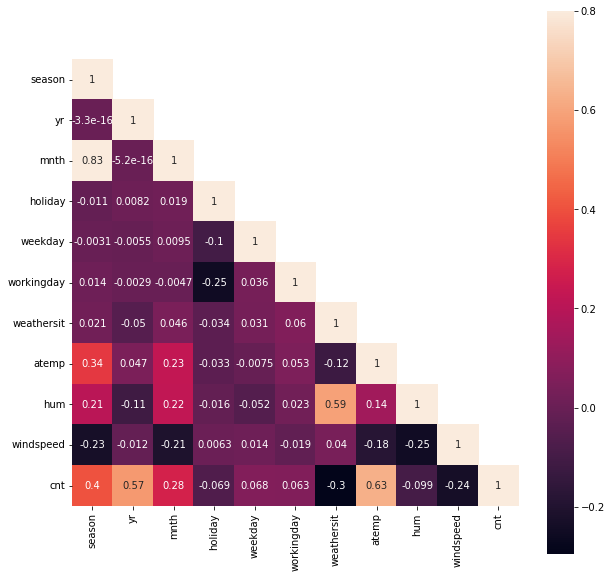

In [9]:
mask = np.array(df.corr())
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(df.corr(), mask=mask,vmax=.8, square=True,annot=True)

In [10]:
df[['season',	'yr',	'mnth',	'holiday',	'weekday'	,'workingday'	,'weathersit']].describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000


In [11]:
df['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=100)

Data is split into 80-20 ratio


In [13]:
df_train.shape , df_test.shape

((584, 11), (146, 11))

In [14]:
df_train

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
367,1,1,1,0,2,1,1,6.31375,44.1250,24.499957,2236
648,4,1,10,0,4,1,1,21.55835,46.3333,12.166932,7570
44,1,0,2,0,1,1,1,19.91750,37.5833,27.999836,1913
705,4,1,12,0,5,1,2,16.09790,76.4167,8.750200,5008
379,1,1,1,0,0,0,1,8.08125,41.9167,16.834286,2311
...,...,...,...,...,...,...,...,...,...,...,...
578,3,1,8,0,4,1,1,35.35440,65.9583,8.666718,7261
53,1,0,2,0,3,1,1,12.28585,42.3043,6.305571,1917
350,4,0,12,0,6,0,2,12.46855,56.0833,16.292189,2739
79,2,0,3,0,1,1,2,20.48675,73.7391,19.348461,2077


In [15]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scale_df = ['season','mnth','weekday','weathersit','atemp'	,'hum'	,'windspeed'	,'cnt']
df_train[scale_df] = scalar.fit_transform(df_train[scale_df])
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
367,0.0,1,0.000000,0,0.333333,1,0.0,0.061963,0.454701,0.695175,0.254717
648,1.0,1,0.818182,0,0.666667,1,0.0,0.462175,0.477458,0.299450,0.868385
44,0.0,0,0.090909,0,0.166667,1,0.0,0.419099,0.387290,0.807474,0.217556
705,1.0,1,1.000000,0,0.833333,1,0.5,0.318824,0.787463,0.189819,0.573631
379,0.0,1,0.000000,0,0.000000,0,0.0,0.108365,0.431945,0.449210,0.263346


Leaving the yes/no variables and scaling others

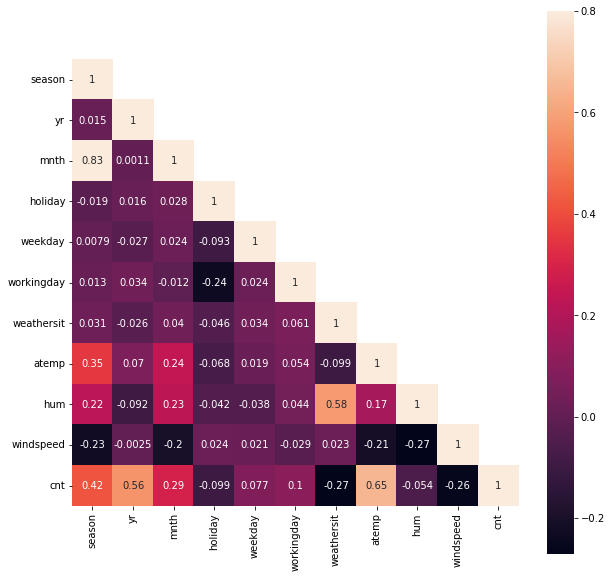

In [16]:
mask = np.array(df_train.corr())
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(df_train.corr(), mask=mask,vmax=.8, square=True,annot=True)

In [33]:
y_train = df_train['cnt']
X_train = df_train.drop(['cnt'],axis=1) 

In [18]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train['atemp'])
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const    0.159540
atemp    0.694212
dtype: float64

In [19]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     430.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           5.23e-72
Time:                        16:59:59   Log-Likelihood:                 203.80
No. Observations:                 584   AIC:                            -403.6
Df Residuals:                     582   BIC:                            -394.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1595      0.019      8.591      0.000       0.123       0.196
atemp          0.6942      0.033     20.750      0.000       0.629       0.760
==============================================================================
Omnibus:                        5.370   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                4.232
Skew:                           0.101   Prob(JB):                        0.121
Kurtosis:                       2.635   Cond. No.                         6.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
X_train_lm = sm.add_constant(X_train[['atemp','yr']])
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     658.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.07e-150
Time:                        16:59:59   Log-Likelihood:                 387.63
No. Observations:                 584   AIC:                            -769.3
Df Residuals:                     581   BIC:                            -756.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0593      0.014      4.157      0.000       0.031       0.087
atemp          0.6552      0.025     26.741      0.000       0.607       0.703
yr             0.2340      0.010     22.571      0.000       0.214       0.254
==============================================================================
Omnibus:                       41.904   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.849
Skew:                          -0.549   Prob(JB):                     6.12e-14
Kurtosis:                       4.139   Cond. No.                         6.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Train a stat model with all the variables

In [21]:
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     241.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.05e-198
Time:                        16:59:59   Log-Likelihood:                 524.11
No. Observations:                 584   AIC:                            -1026.
Df Residuals:                     573   BIC:                            -978.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1694      0.030      5.683      0.000       0.111       0.228
season         0.1632      0.021      7.850      0.000       0.122       0.204
yr             0.2318      0.008     27.789      0.000       0.215       0.248
mnth          -0.0380      0.024     -1.595      0.111      -0.085       0.009
holiday       -0.0781      0.026     -2.978      0.003      -0.130      -0.027
weekday        0.0539      0.012      4.366      0.000       0.030       0.078
workingday     0.0222      0.009      2.456      0.014       0.004       0.040
weathersit    -0.1530      0.020     -7.743      0.000      -0.192      -0.114
atemp          0.5255      0.022     24.067      0.000       0.483       0.568
hum           -0.0993      0.039     -2.527      0.012      -0.177      -0.022
windspeed     -0.1533      0.027     -5.767      0.000      -0.205      -0.101
==============================================================================
Omnibus:                       79.129   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.166
Skew:                          -0.730   Prob(JB):                     1.68e-40
Kurtosis:                       5.323   Cond. No.                         22.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,hum,15.84
2,mnth,11.78
0,season,9.89
7,atemp,8.36
9,windspeed,3.69
5,workingday,3.09
4,weekday,2.98
6,weathersit,2.17
1,yr,2.01
3,holiday,1.10


From the above we can say that mnth has high p value and hum has high VIF value

In [23]:
y_train_pred = lr.predict(X_train_lm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


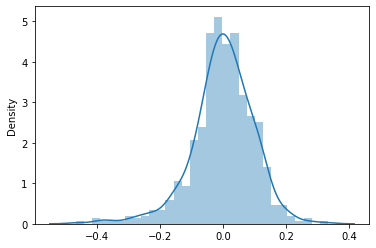

In [24]:
res = y_train - y_train_pred
sns.distplot(res) 

In [25]:
scale_df = ['season','mnth','weekday','weathersit','atemp'	,'hum'	,'windspeed'	,'cnt']
df_test[scale_df] = scalar.transform(df_test[scale_df])
df_test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
184,0.666667,0,0.545455,1,0.166667,0,0.5,0.769660,0.657364,0.084219,0.692706
535,0.333333,1,0.454545,0,0.500000,1,0.0,0.842587,0.610133,0.153728,0.712034
299,1.000000,0,0.818182,0,0.666667,1,0.5,0.496145,0.837699,0.334206,0.303382
221,0.666667,0,0.636364,0,0.500000,1,0.0,0.795343,0.437098,0.339570,0.547400
152,0.333333,0,0.454545,0,0.666667,1,0.0,0.741471,0.314298,0.537414,0.569029


In [26]:
df_test.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.497717,0.445205,0.493773,0.034247,0.537671,0.746575,0.191781,0.542752,0.635933,0.315127,0.517368
std,0.357185,0.498699,0.304597,0.182488,0.319105,0.436469,0.277055,0.222120,0.156357,0.161524,0.212757
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.055683
25%,0.333333,0.000000,0.272727,0.000000,0.333333,0.250000,0.000000,0.346732,0.534457,0.196160,0.391251
50%,0.500000,0.000000,0.454545,0.000000,0.666667,1.000000,0.000000,0.544652,0.614856,0.306383,0.508916
75%,0.666667,1.000000,0.727273,0.000000,0.833333,1.000000,0.500000,0.743337,0.730570,0.411976,0.649994
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.980934,1.002146,0.800793,0.963300


In [27]:
y_test = df_test['cnt']
X_test = df_test.drop(['cnt'],axis=1) 

In [28]:
x_test_sm = sm.add_constant(X_test)
x_test_sm.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed
184,1.0,0.666667,0,0.545455,1,0.166667,0,0.5,0.769660,0.657364,0.084219
535,1.0,0.333333,1,0.454545,0,0.500000,1,0.0,0.842587,0.610133,0.153728
299,1.0,1.000000,0,0.818182,0,0.666667,1,0.5,0.496145,0.837699,0.334206
221,1.0,0.666667,0,0.636364,0,0.500000,1,0.0,0.795343,0.437098,0.339570
152,1.0,0.333333,0,0.454545,0,0.666667,1,0.0,0.741471,0.314298,0.537414


In [29]:
X_test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed
184,0.666667,0,0.545455,1,0.166667,0,0.5,0.769660,0.657364,0.084219
535,0.333333,1,0.454545,0,0.500000,1,0.0,0.842587,0.610133,0.153728
299,1.000000,0,0.818182,0,0.666667,1,0.5,0.496145,0.837699,0.334206
221,0.666667,0,0.636364,0,0.500000,1,0.0,0.795343,0.437098,0.339570
152,0.333333,0,0.454545,0,0.666667,1,0.0,0.741471,0.314298,0.537414


In [30]:
y_test_pred = lr.predict(x_test_sm)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_true = y_test, y_pred = y_test_pred)

0.7571516482866794

RFE

Using automated method to analyze

In [117]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=100)

In [118]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [119]:
df_train.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [120]:
num_vars = ['season', 'mnth', 'weekday', 'weathersit', 'atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
367,0.0,1,0.000000,0,0.333333,1,0.0,0.061963,0.454701,0.695175,0.254717
648,1.0,1,0.818182,0,0.666667,1,0.0,0.462175,0.477458,0.299450,0.868385
44,0.0,0,0.090909,0,0.166667,1,0.0,0.419099,0.387290,0.807474,0.217556
705,1.0,1,1.000000,0,0.833333,1,0.5,0.318824,0.787463,0.189819,0.573631
379,0.0,1,0.000000,0,0.000000,0,0.0,0.108365,0.431945,0.449210,0.263346


In [121]:
y_train = df_train.pop('cnt')
X_train = df_train

In [122]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

Taking number of features as 10 randomly

In [123]:
# Import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm,n_features_to_select= 10)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)
print(rfe1.ranking_)

[ True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1]


In [50]:
# Import RFE

# RFE with 15 features
lm2 = LinearRegression()
rfe2 = RFE(lm,n_features_to_select= 3)

# Fit with 15 features
rfe2.fit(X_train, y_train)

# Print the boolean results
print(rfe2.support_)
print(rfe2.ranking_)

[False  True False False False False  True  True False False]
[2 1 7 5 6 8 1 1 4 3]


In [51]:
top3 = X_train.columns[rfe2.support_]
top3

Index(['yr', 'weathersit', 'atemp'], dtype='object')

In [124]:
col = X_train.columns[rfe1.support_]
col

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [125]:
X_train_rfe = X_train[col]


WIth the columns from RFE train a statmodel

In [126]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [127]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     241.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.05e-198
Time:                        17:47:39   Log-Likelihood:                 524.11
No. Observations:                 584   AIC:                            -1026.
Df Residuals:                     573   BIC:                            -978.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1694      0.030      5.683      0.0

mnth is insignificant in presence of other variables; can be dropped

In [128]:
X_train_new = X_train_rfe.drop(["mnth"], axis = 1)


In [129]:
X_train_new.columns

Index(['const', 'season', 'yr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed'],
      dtype='object')

Rebuilding model without Month

In [130]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     267.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.06e-198
Time:                        17:49:25   Log-Likelihood:                 522.81
No. Observations:                 584   AIC:                            -1026.
Df Residuals:                     574   BIC:                            -981.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1656      0.030      5.566      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [131]:
X_train_new.columns


Index(['const', 'season', 'yr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [132]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,hum,14.76
6,atemp,8.27
8,windspeed,3.68
0,season,3.36
4,workingday,3.09
3,weekday,2.96
5,weathersit,2.16
1,yr,2.01
2,holiday,1.09


Residual Analysis of the train data

In [134]:
y_train_pred = lm.predict(X_train_lm)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

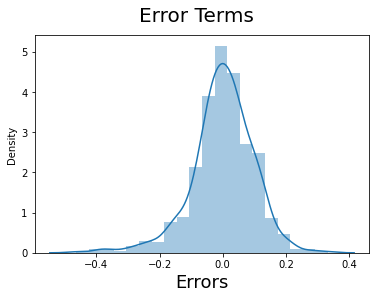

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

The error has zero mean

In [136]:
num_vars = ['season', 'mnth', 'weekday', 'weathersit', 'atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
184,0.666667,0,0.545455,1,0.166667,0,0.5,0.769660,0.657364,0.084219,0.692706
535,0.333333,1,0.454545,0,0.500000,1,0.0,0.842587,0.610133,0.153728,0.712034
299,1.000000,0,0.818182,0,0.666667,1,0.5,0.496145,0.837699,0.334206,0.303382
221,0.666667,0,0.636364,0,0.500000,1,0.0,0.795343,0.437098,0.339570,0.547400
152,0.333333,0,0.454545,0,0.666667,1,0.0,0.741471,0.314298,0.537414,0.569029


In [137]:
y_test = df_test.pop('cnt')
X_test = df_test

In [138]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [140]:
X_test_new.columns

Index(['const', 'season', 'yr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [141]:
y_pred = lm.predict(X_test_new)


Text(0, 0.5, 'y_pred')

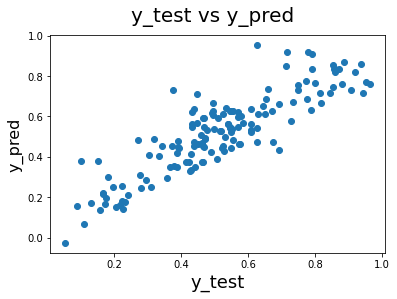

In [142]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)       

In [144]:
residual = y_test - y_pred

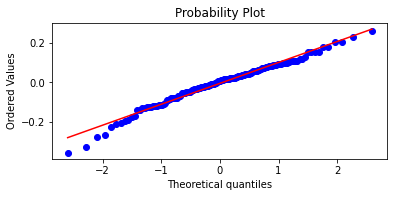

In [145]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [146]:
np.mean(residual)

-0.0047656904127921325

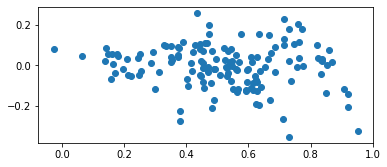

In [147]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

It can be seen that the error does not have any pattern